# Utilities 

In [119]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import scipy
import random
from seaborn import color_palette, set_style, palplot

# Graph Creation 

## Full Graph 

In [252]:
df = pd.read_csv('data/twitter_graph_location.csv') #Reads in the .csv file

df = df.drop(columns=['Unnamed: 0'])
df['unique'] = ~df['author_id'].duplicated(keep=False)
df = df[df.unique]

G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted') #Creates the graph 


#Need to add in node attributes from dataframe 

# node_colors = {'Male': 'blue', 'Female': 'red'}
# df_nodes['node_color'] = df_nodes['Gender'].map(node_colors)

author_id = df['author_id'].values.tolist()

like_count = df['like_count'].values.tolist()

reply_count= df['reply_count'].values.tolist()


retweet_count= df['retweet_count'].values.tolist()

followers_count= df['followers_count'].values.tolist()

following_count= df['following_count'].values.tolist()

listed_count = df['listed_count'].values.tolist()

tweet_count= df['tweet_count'].values.tolist()

sentiment= df['sentiment'].values.tolist()

for i in range(len(sentiment)):
    if sentiment[i] == 'Positive':
        sentiment[i] = "green"
    else:
        sentiment[i] = 'red'

quote_count = df['quote_count'].values.tolist()

nodes = pd.DataFrame({'node' : author_id,
                      'like_count' : like_count,
                      'reply_count' : reply_count,
                      'retweet_count' : retweet_count,
                      'followers_count' :followers_count,
                      'following_count' : following_count,
                      'listed_count' : listed_count,
                      'tweet_count' : tweet_count,
                      'sentiment' : sentiment,
                      'quote_count' :quote_count })


for i in range(len(like_count)):
     nx.set_node_attributes(G, like_count[i], "like_count")

for i in range(len(reply_count)):
    nx.set_node_attributes(G, reply_count[i], "reply_count")

for i in range(len(retweet_count)):
    nx.set_node_attributes(G, retweet_count[i], "retweet_count")

for i in range(len(followers_count)):
    nx.set_node_attributes(G, followers_count[i], "followers_count")

for i in range(len(following_count)):
    nx.set_node_attributes(G, following_count[i], "following_count")

for i in range(len(listed_count)):
    nx.set_node_attributes(G, listed_count[i], "listed_count")

for i in range(len(tweet_count)):
    nx.set_node_attributes(G, tweet_count[i], "tweet_count")

for i in range(len(sentiment)):
    nx.set_node_attributes(G, sentiment[i], "sentiment")

for i in range(len(quote_count)):
    nx.set_node_attributes(G, quote_count[i], "quote_count")



In [253]:
df_nodes = pd.DataFrame({
    'author_id': author_id,
    'sentiment': sentiment
})
df_nodes['node_color'] = df_nodes['sentiment']

In [255]:
nodes_attr = df_nodes.set_index('author_id').to_dict(orient = 'index')
nx.set_node_attributes(G, nodes_attr)
nx.get_node_attributes(G, 'sentiment')

{596174897: 'green',
 1.32486661401421e+18: 'green',
 1309864416767139853: 'green',
 2453578782: 'red',
 290156022: 'red',
 376843909: 'green',
 36201675: 'red',
 767424168669229057: 'red',
 49181414: 'red',
 707938453: 'green',
 68091766: 'green',
 864923719436836864: 'green',
 1259468580: 'green',
 1285333613677088772: 'red',
 77679836: 'red',
 709196418733449216: 'green',
 480050793: 'red',
 2670160589: 'red',
 843254775990829056: 'red',
 18086847: 'red',
 2841819968: 'green',
 775905636005445632: 'red',
 62835123: 'green',
 2823280973: 'green',
 840042230: 'green',
 858110570289143808: 'green',
 51445034: 'green',
 1290373560704221184: 'green',
 1408294447: 'green',
 252286126: 'green',
 920827469657030656: 'green',
 1.3248664845360128e+18: 'green',
 19956833: 'green',
 24658978: 'green',
 2806348967: 'green',
 16482012: 'green',
 3843640245: 'green',
 2917954106: 'red',
 882419319950462976: 'red',
 791324150874812416: 'green',
 732716625619648512: 'red',
 759849779878821888: 'gree

In [264]:
G.number_of_nodes()

1056

[]

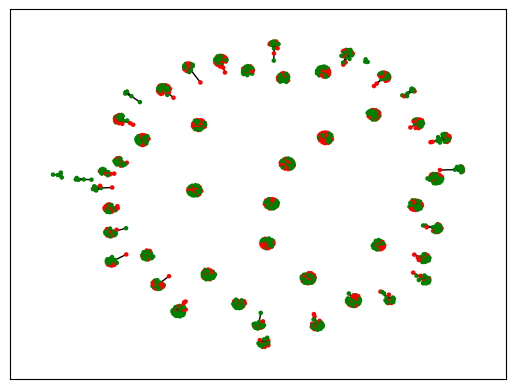

In [265]:
nx.draw_networkx(G, 
    pos = nx.spring_layout(G), 
    node_size = 5, 
    node_color = [G.nodes[n]['sentiment'] for n in G.nodes], with_labels= False)
plt.plot()

## Subgraph 

In [262]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
G_Sub = create_subgraph(G,1326702923611574272)



In [141]:
def create_color_map(G, attribute, seaborn_palette="Set2"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.nodes[author_id][attribute] for author_id in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [144]:
node_colors, color_map, palette = create_color_map(G, 'sentiment')

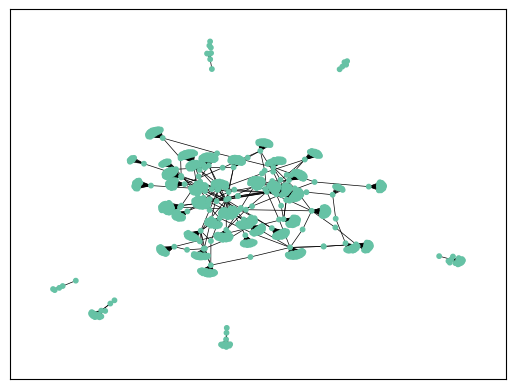

In [146]:
plt.figure 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=10)
nx.draw_networkx_edges(G, pos, width=.5)

plt.show()

In [201]:
color_map = nx.get_node_attributes(G,"sentiment")

for key in color_map:
    if color_map[key] == 1:
        color_map[key] = 'green'
    if color_map[key] == 0:
        color_map[key] ='red'

color_map

{596174897: 'green',
 1.32486661401421e+18: 'green',
 1309864416767139853: 'green',
 2453578782: 'green',
 290156022: 'green',
 556291837: 'green',
 1.3248664845360128e+18: 'green',
 1.3248663021005087e+18: 'green',
 1.3248658133256806e+18: 'green',
 1.3248660110494351e+18: 'green',
 1.3248661063271834e+18: 'green',
 1.3248653336651407e+18: 'green',
 1.3248651233039196e+18: 'green',
 1.3248650496939827e+18: 'green',
 1.3248595154440806e+18: 'green',
 1.3248606321733222e+18: 'green',
 1.324860749563351e+18: 'green',
 1.324860835483693e+18: 'green',
 1.3247444448103014e+18: 'green',
 1.324859203861754e+18: 'green',
 1.3248524024160952e+18: 'green',
 1.3247526599963976e+18: 'green',
 1.3248294610035548e+18: 'green',
 376843909: 'green',
 36201675: 'green',
 767424168669229057: 'green',
 49181414: 'green',
 707938453: 'green',
 68091766: 'green',
 864923719436836864: 'green',
 1259468580: 'green',
 1285333613677088772: 'green',
 77679836: 'green',
 709196418733449216: 'green',
 480050793: 

## Largest Connected Component

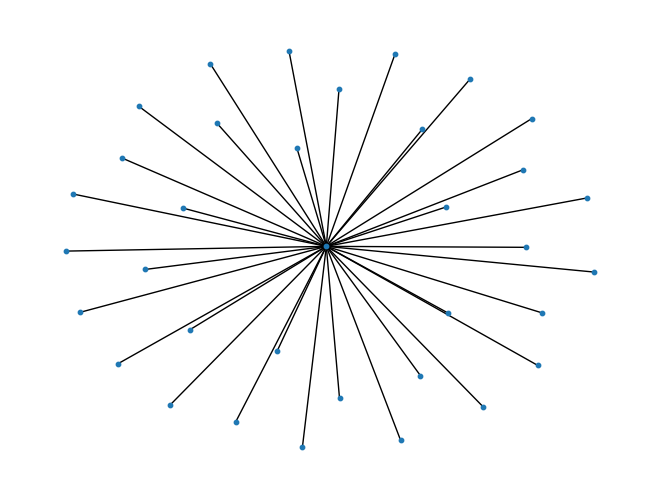

In [266]:
G_Conn = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (_, val) in G_Conn.degree()]

G_Conn.number_of_nodes()#/3500 *100

nx.draw(G_Conn, node_size=10)


In [184]:
#G.nodes[2453578782][sentiment]

color = nx.get_node_attributes(G, "sentiment")
color[703079350657290240]

'Positive'

In [199]:
color_map = nx.get_node_attributes(G_Conn,"sentiment")

for key in color_map:
    if color_map[key] == 1:
        color_map[key] = 'green'
    if color_map[key] == 0:
        color_map[key] ='red'

sent_colors = [color_map.get(node) for node in G.nodes()] 

color_map

{596174897: 'Positive',
 1.32486661401421e+18: 'Positive',
 1309864416767139853: 'Positive',
 2453578782: 'Positive',
 290156022: 'Positive',
 556291837: 'Positive',
 1.3248664845360128e+18: 'Positive',
 1.3248663021005087e+18: 'Positive',
 1.3248658133256806e+18: 'Positive',
 1.3248660110494351e+18: 'Positive',
 1.3248661063271834e+18: 'Positive',
 1.3248653336651407e+18: 'Positive',
 1.3248651233039196e+18: 'Positive',
 1.3248650496939827e+18: 'Positive',
 1.3248595154440806e+18: 'Positive',
 1.3248606321733222e+18: 'Positive',
 1.324860749563351e+18: 'Positive',
 1.324860835483693e+18: 'Positive',
 1.3247444448103014e+18: 'Positive',
 1.324859203861754e+18: 'Positive',
 1.3248524024160952e+18: 'Positive',
 1.3247526599963976e+18: 'Positive',
 1.3248294610035548e+18: 'Positive',
 376843909: 'Positive',
 36201675: 'Positive',
 767424168669229057: 'Positive',
 49181414: 'Positive',
 707938453: 'Positive',
 68091766: 'Positive',
 864923719436836864: 'Positive',
 1259468580: 'Positive',


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', None, None, 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', None, None, None, None, None, None, None, None, None, None, None, None, 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'green', 'green', 'green', 'green', 'green', 'green', 'green', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

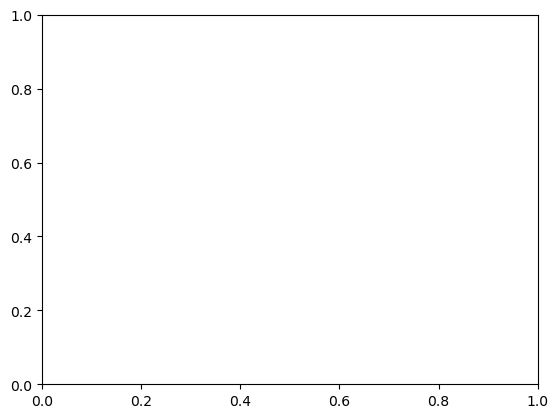

In [191]:
sent_colors = [color_map.get(node) for node in G.nodes()] 
plt.figure 
pos = nx.spring_layout(G_Conn)
nx.draw_networkx_nodes(G_Conn, pos, node_color=sent_colors, node_size=5)
nx.draw_networkx_edges(G_Conn, pos, width=1)

plt.show()

## Random Sample

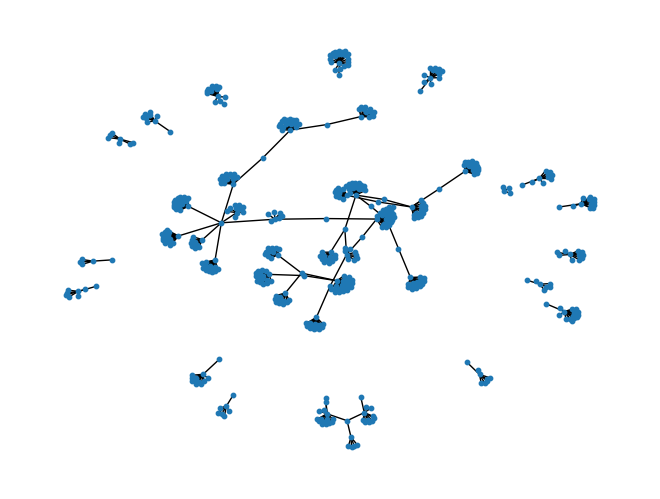

In [135]:
random_sample_edges = random.sample(list(G_Conn.edges), 500)
G_Rand = nx.Graph()
G_Rand.add_edges_from(random_sample_edges)

nx.draw(G_Rand, node_size=10)

In [136]:
node_colors, color_map, palette = create_color_map(G_Rand, 'sentiment')

KeyError: 'sentiment'

# Analysis